In [39]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

import numpy as np
import os, cv2

def plot_gallery(images, titles, h, w, n_row = 3, n_col = 4 ):
    plt.figure(figsize = (1.8*n_col, 2.4*n_row))
    plt.subplots_adjust(bottom = 0, left = 0.01, right = .99, top = .90, hspace = .35)
    for i in range(n_row*n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h,w)), cmap = plt.cm.gray)
        plt.title(titles[i], size = 12)
        plt.xticks(())
        plt.yticks(())        

In [41]:
directory = "dataset/faces/"
y = []; X = []; target_names = []
person_id = 0; h = w = 300
n_samples = 0
class_names = []
for person in os.listdir(directory):
    dir_path = directory+person+"/"
    class_names.append(person)
    for image_name in os.listdir(dir_path):
        image_path = dir_path+image_name
        img = cv2.imread(image_path)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        resized_image = cv2.resize(gray, (h,w))
        v = resized_image.flatten()
        X.append(v)
        n_samples = n_samples+1
        y.append(person_id)
        target_names.append(person)
    person_id += 1


y = np.array(y)
X = np.array(X)
target_names = np.array(target_names)
n_features = X.shape[1]
print(y.shape, X.shape, target_names.shape)
print("No. of Samples : ", n_samples)
n_classes = target_names.shape[0]

print("Total Size : ")
print("n_samples : ", n_samples)
print("n_features : ", n_features)
print("n_classes : ", n_classes)

(450,) (450, 90000) (450,)
No. of Samples :  450
Total Size : 
n_samples :  450
n_features :  90000
n_classes :  450


Extracting the top 150 EigenFaces from 337


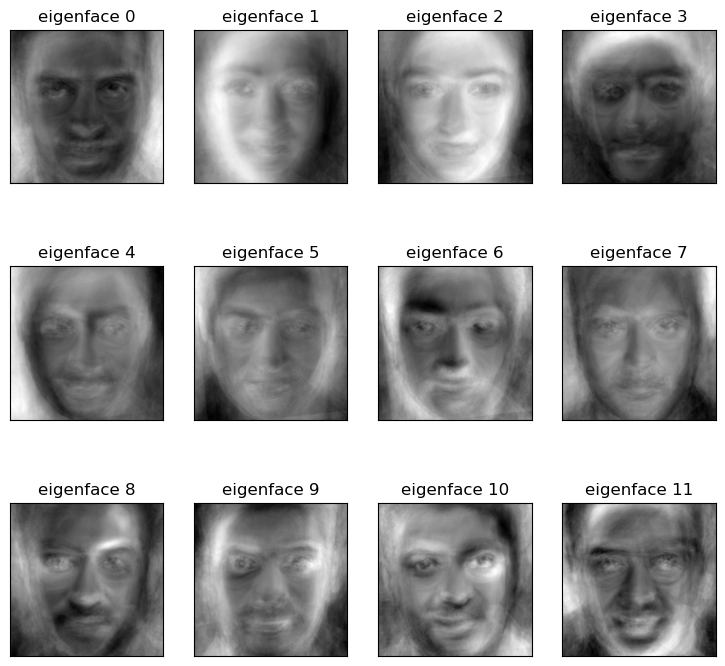

Projecting the input data on the Eigenfaces orthonormal basis
(337, 150) (113, 150)
Project Done


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

n_components = 150

print(f"Extracting the top {n_components} EigenFaces from {X_train.shape[0]}")

pca = PCA(n_components = n_components, svd_solver = 'randomized', whiten = True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))


eigenface_title = ["eigenface %d" %i for i in range(eigenfaces.shape[0])]

plot_gallery(eigenfaces, eigenface_title, h, w)

plt.show()

print("Projecting the input data on the Eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape, X_test_pca.shape)


lda = LinearDiscriminantAnalysis()

lda.fit(X_train_pca, y_train)

X_train_lda = lda.transform(X_train_pca)
X_test_lda = lda.transform(X_test_pca)
print("Project Done")

In [44]:
clf = MLPClassifier(random_state = 1, hidden_layer_sizes = (10,10), max_iter = 1000, verbose = True).fit(X_train_lda, y_train)
print("Model Weights : ")
model_info = [coef.shape for coef in clf.coefs_]
print(modeel_info)

Iteration 1, loss = 2.87316513
Iteration 2, loss = 2.82304576
Iteration 3, loss = 2.77464098
Iteration 4, loss = 2.72699185
Iteration 5, loss = 2.68096459
Iteration 6, loss = 2.63692657
Iteration 7, loss = 2.59251263
Iteration 8, loss = 2.54996923
Iteration 9, loss = 2.50978592
Iteration 10, loss = 2.46954373
Iteration 11, loss = 2.43122825
Iteration 12, loss = 2.39453432
Iteration 13, loss = 2.35919207
Iteration 14, loss = 2.32546479
Iteration 15, loss = 2.29014215
Iteration 16, loss = 2.25759307
Iteration 17, loss = 2.22545339
Iteration 18, loss = 2.19398326
Iteration 19, loss = 2.16402271
Iteration 20, loss = 2.13392779
Iteration 21, loss = 2.10530320
Iteration 22, loss = 2.07653346
Iteration 23, loss = 2.04992975
Iteration 24, loss = 2.02255346
Iteration 25, loss = 1.99487884
Iteration 26, loss = 1.96969143
Iteration 27, loss = 1.94294368
Iteration 28, loss = 1.91834003
Iteration 29, loss = 1.89289593
Iteration 30, loss = 1.86879848
Iteration 31, loss = 1.84466417
Iteration 32, los

NameError: name 'modeel_info' is not defined

Accuracy :  72.56637168141593


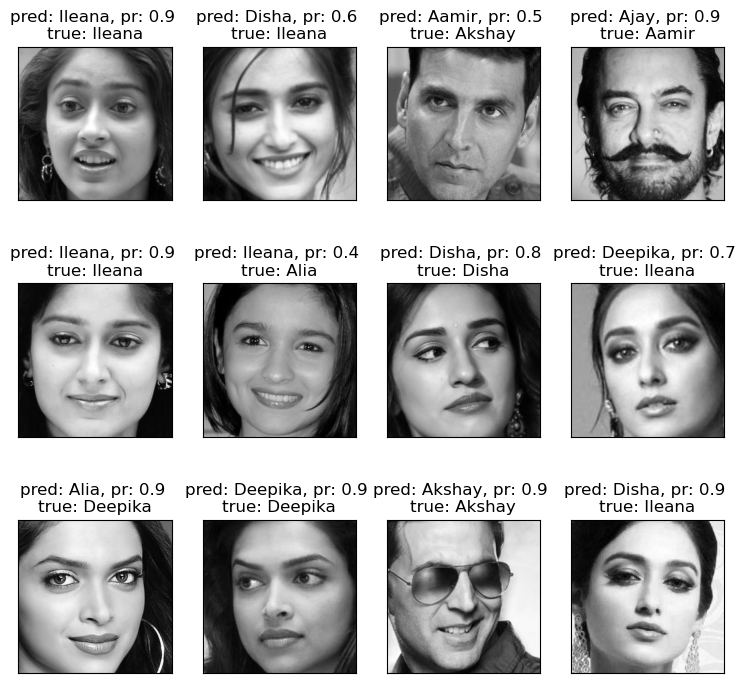

In [46]:
y_pred = []; y_prob = []
for test_face in X_test_lda:
    prob = clf.predict_proba([test_face])[0]
    class_id = np.where(prob == np.max(prob))[0][0]

    y_pred.append(class_id)
    y_prob.append(np.max(prob))

y_pred = np.array(y_pred)

prediction_titles = []
true_positive = 0

for i in range(y_pred.shape[0]):
    true_name = class_names[y_test[i]]
    pred_name = class_names[y_pred[i]]
    result = 'pred: %s, pr: %s \ntrue: %s' % (pred_name, str(y_prob[i])[0:3], true_name)

    prediction_titles.append(result)
    if true_name == pred_name:
        true_positive+=1


print("Accuracy : ", true_positive*100/y_pred.shape[0])

plot_gallery(X_test, prediction_titles, h, w)
plt.show()
